### 0719 DOING frame consistency

## ELAN Evaluation metrics (Dim delta, depth, alpha, Dim consistency)

In [39]:
from library.ron_utils import *
import matplotlib.pyplot as plt
from library.ron_utils import iou_2d, TrackingObject
from ELAN_label_trackID import tracking_obj_by_labels
from ELAN_EVAL import evaluation

'''
cam_to_img = np.array([
        [ 1.418667e+03, 0.000000e+00, 6.4e+02,0],
        [ 0.000000e+00, 1.418667e+03, 3.6e+02,0],
        [ 0.000000e+00, 0.000000e+00, 1.000000e+00,0]])
'''

def ELAN_eval_metrics(result_root):
    valset = [x.strip() for x in open('Elan_3d_box/ImageSets/val.txt').readlines()]
    dim_GT = list()
    dim_ELAN = list()
    depth_GT = list()
    depth_ELAN = list()
    alpha_GT = list()
    alpha_ELAN = list()
    #set_ = set()
    for id_ in valset:
        gt_lines = [x.strip() for x in open(f'Elan_3d_box/renew_label_obj/{id_}.txt').readlines()]
        gt_objects = [TrackingObject(line) for line in gt_lines if line.split()[0].lower()=='car']
        
        for obj in gt_objects:
            #set_.add(obj.id)
            dim_GT.append(obj.dims[0])
            depth_GT.append(obj.locs[0][2])
            alpha_GT.append(obj.alphas[0])
            
        pred_lines = [x.strip() for x in open(f'{result_root}/label_2/{id_}.txt').readlines()]
        pred_objects = [TrackingObject(line) for line in pred_lines if line.split()[0].lower()=='car']
        for obj in pred_objects:
            dim_ELAN.append(obj.dims[0])
            depth_ELAN.append(obj.locs[0][2])
            alpha_ELAN.append(obj.alphas[0])
    
    #print('OBJECT NUM', len(set_))
    #print(set_)
    dim_GT = np.array(dim_GT)
    dim_ELAN = np.array(dim_ELAN)
    depth_GT = np.array(depth_GT)
    depth_ELAN = np.array(depth_ELAN)
    alpha_GT = np.array(alpha_GT)
    alpha_ELAN = np.array(alpha_ELAN)

    depth_diff = depth_GT-depth_ELAN
    alpha_diff = np.cos(alpha_GT - alpha_ELAN)
    dim_diff = np.mean(abs(dim_GT-dim_ELAN), axis=0)
    print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
    
    print(f'[Alpha diff] abs_mean: {1-alpha_diff.mean():.4f}')
    plt.hist(alpha_diff)
    plt.show()
    print(f'[Depth diff] abs_mean: {abs(depth_diff).mean():.4f}')
    print('[Depth error]')
    box_depth_error_calculation(depth_GT, depth_ELAN, 5)

ImportError: cannot import name 'iou_2d' from 'library.ron_utils' (/data/ron/elan_project/library/ron_utils.py)

In [ ]:
# BL_IMAGENET BL_ELAN
# video_IMAGENET video_ELAN
date = '0720/'
N0_folders = ['BL_B4_N0', 'V_dim_B4_N0', 'V_alpha_B4_N0', 'V_dim_alpha_B4_N0']
N1_folders = ['BL_B4_N1', 'V_dim_B4_N1', 'V_alpha_B4_N1', 'V_dim_alpha_B4_N1']
is_group = False
for f in N0_folders:
    tmp_f = date + f
    if is_group:
        tmp_f += '_G_W10'
    print(f'========{tmp_f}========')
    ELAN_eval_metrics(tmp_f)
    print()


# 0911 KITTI Tracking Dataset

In [ ]:
import os 
import numpy as np 
import matplotlib.pyplot as plt
from torch_lib.KITTI_Dataset import Object3d
cls_list = ['car']
diff_list = [1, 2]

gt_root='Kitti/training/label_2'
result_root='0907/Track_KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]

GT_dim = list()
GT_depth = list()
GT_alpha = list()
REG_dim = list()
REG_depth = list()
REG_alpha = list()

for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]

    for gt, reg in zip(gt_objects, reg_objects):
        if gt.cls_type in cls_list and gt.level in diff_list:
            GT_dim.append(gt.dim)
            GT_depth.append(gt.pos[2])
            GT_alpha.append(gt.alpha)

            REG_dim.append(reg.dim)
            REG_depth.append(reg.pos[2])
            REG_alpha.append(reg.alpha)
            
GT_dim = np.array(GT_dim)
GT_depth = np.array(GT_depth)
GT_alpha = np.array(GT_alpha)
REG_dim = np.array(REG_dim)
REG_depth = np.array(REG_depth)
REG_alpha = np.array(REG_alpha)

alpha_diff = np.cos(GT_alpha - REG_alpha)
dim_diff = np.mean(abs(GT_dim - REG_dim), axis=0)
print(f'[Alpha diff] abs_mean: {1-alpha_diff.mean():.4f}')
print(f'[DIM diff] H:{dim_diff[0]:.4f}, W:{dim_diff[1]:.4f}, L:{dim_diff[2]:.4f}')
plt.hist(alpha_diff)
plt.show()

## 0913 Length Analysis

In [ ]:
## 0919
import os
from torch_lib.KITTI_Dataset import *

gt_root='Kitti/training/label_2'
result_root='_REG_labels/0822/KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]
cls_list = ['car']
diff_list = [1,2]
GT_L, GT_alpha = list(), list()
REG_L, REG_alpha = list(), list()
for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]
    count = 0
    for i in range(len(gt_objects)):
        gt = gt_objects[i]
        if gt.cls_type.lower() in cls_list and gt.level in diff_list:
            #print(gt.alpha, reg.alpha)
            reg = reg_objects[count]
            GT_L.append(gt.dim[2])
            GT_alpha.append(gt.alpha)
            REG_L.append(reg.dim[2])
            REG_alpha.append(reg.alpha)
            count+=1

GT_L = np.array(GT_L)
GT_alpha = np.array(GT_alpha)
REG_L = np.array(REG_L)
REG_alpha = np.array(REG_alpha)

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print('ALL:', GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg))) #0-18, #18-40, #40-90


In [ ]:
## 0919
import os
from torch_lib.KITTI_Dataset import *

gt_root='Kitti/training/label_2'
result_root='0822_aug/KITTI_BL_B4_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]
cls_list = ['car']
diff_list = [1,2]
GT_L, GT_alpha = list(), list()
REG_L, REG_alpha = list(), list()
for id_ in val_ids:
    gt_label = os.path.join(gt_root, f'{id_}.txt')
    gt_objects = [Object3d(line) for line in open(gt_label).readlines()]
    reg_label = os.path.join(result_root, f'{id_}.txt')
    reg_objects = [Object3d(line) for line in open(reg_label).readlines()]
    count = 0
    for i in range(len(gt_objects)):
        gt = gt_objects[i]
        if gt.cls_type.lower() in cls_list and gt.level in diff_list:
            #print(gt.alpha, reg.alpha)
            reg = reg_objects[count]
            GT_L.append(gt.dim[2])
            GT_alpha.append(gt.alpha)
            REG_L.append(reg.dim[2])
            REG_alpha.append(reg.alpha)
            count+=1

GT_L = np.array(GT_L)
GT_alpha = np.array(GT_alpha)
REG_L = np.array(REG_L)
REG_alpha = np.array(REG_alpha)

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print('ALL:', GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg))) #0-18, #18-40, #40-90


In [ ]:

degree_18 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.3), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.3)))
degree_40 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) < 0.7), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) < 0.7)))
degree_90 = np.where(np.logical_or(np.logical_and(GT_alpha>=0, np.cos(GT_alpha-1.57) <= 1), np.logical_and(GT_alpha<0, np.cos(GT_alpha-1.57) <= 1)))

degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]

print(GT_L.shape[0], np.mean(abs(GT_L-REG_L)))
for condition in [degree_18, degree_18_40, degree_40_90]:
    gt = GT_L[condition]
    reg = REG_L[condition]
    print(gt.shape[0], np.mean(abs(gt-reg)))

In [ ]:
degree_18_40 = [d for d in degree_40[0] if d not in degree_18[0]]
degree_40_90 = [d for d in degree_90[0] if d not in degree_40[0]]
print(len(degree_18[0]))
print(len(degree_18_40))
print(len(degree_40_90))
print(len(GT_L))

## IOU TRIAL

In [ ]:
def loc3d_2_box2d(orient, location, dimension, cam_to_img):
    prj_points = []
    R = np.array([[np.cos(orient), 0, np.sin(orient)], [0, 1, 0], [-np.sin(orient), 0, np.cos(orient)]])
    corners = create_corners(dimension, location, R)
    for corner in corners:
        point = project_3d_pt(corner, cam_to_img)
        prj_points.append(point)

    prj_points = np.array(prj_points)
    prj_points_X = prj_points[:,0]
    prj_points_Y = prj_points[:,1]
    prj_box = [min(prj_points_X), min(prj_points_Y), max(prj_points_X), max(prj_points_Y)]
    prj_box = np.array(prj_box, dtype=np.int32)
    return prj_box

def calc_IoU_loss(gt_box2d, gt_theta_ray, reg_dim, reg_alpha, calib):
    iou_loss = torch.tensor(0.0)
    reg_ry = reg_alpha + gt_theta_ray
    for i in range(len(reg_dim)):
        reg_loc, _ = calc_location(reg_dim[i], calib[i], gt_box2d[i], reg_ry[i], gt_theta_ray[i])
        prj_box2d = loc3d_2_box2d(reg_ry[i], reg_loc, reg_dim[i], calib[i])
        iou_loss += torch.tensor(1 - calc_IoU_2d(gt_box2d[i], prj_box2d))
    return iou_loss / len(reg_dim)

def box2d_overlap(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm
    return [[x1, y1], [x2, y2]]

def box2d_area(box):
    if len(box)==2: #[ [left, top], [right, btm] ]
        area = (box[1][0]-box[0][0])*(box[1][1]-box[0][1])
    elif len(box)==4: #[left, top, right, btm]
        area = (box[2]-box[0])*(box[3]-box[1]) #有可能會overflow    
    return abs(area)

In [ ]:
from library.ron_utils import *
def calc_IoU_2d(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()
    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = abs(area1) + abs(area2)
    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        area_overlap = abs((x2-x1)*(y2-y1))

    area_union = area_sum-area_overlap
    return area_overlap/area_union

def calc_GIoU_2d(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()
    area1 = box2d_area(box1) #(box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = box2d_area(box2) #(box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = area1 + area2

    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        area_overlap = box2d_area([x1,y1,x2,y2])

    area_union = area_sum-area_overlap
    IoU = area_overlap/area_union

    #計算凸型面積 (包住AB的長方形 - union AB)
    cX1, cY1, cX2, cY2 = get_covex_box(box1, box2)
    area_C = box2d_area([cX1, cY1, cX2, cY2])

    GIoU= IoU - (area_C-area_union)/area_C
    return GIoU

def get_covex_box(box1, box2):
    box1 = np.array(box1, dtype=np.int32).flatten()
    box2 = np.array(box2, dtype=np.int32).flatten()
    x1 = min(box1[0], box2[0]) # left
    y1 = min(box1[1], box2[1]) # top
    x2 = max(box1[2], box2[2]) # right
    y2 = max(box1[3], box2[3]) # btm
    return x1, y1, x2, y2
#
def calc_DIoU_2d(box1, box2):
    center_X1, center_Y1 = get_box_center(box1)
    center_X2, center_Y2 = get_box_center(box2)
    print(center_X1, center_X1, center_X2, center_Y2)
    cX1, cY1, cX2, cY2 = get_covex_box(box1, box2)
    d_square = (center_X1-center_X2)**2 + (center_Y1-center_Y2)**2
    print(d_square)
    c_square = (cX1-cX2)**2 + (cY1-cY2)**2
    print(c_square)
    DIoU = calc_GIoU_2d(box1, box2) - d_square/c_square
    return DIoU

def calc_CIoU_2d(box1, box2):
    w1, h1 = get_box_size(box1)
    w2, h2 = get_box_size(box2)
    gamma = 4/(np.pi**2) * (np.arctan(w1/h1) - np.arctan(w2/h2))**2
    alpha = gamma / (1 - calc_IoU_2d(box1, box2) - gamma)
    DIoU = calc_DIoU_2d(box1, box2)
    print(alpha)
    print(gamma)
    print(alpha*gamma)
    CIoU = DIoU - alpha*gamma
    return CIoU

print('GIOU')
print(calc_GIoU_2d(box_2d, prj_box))
print('DIOU')
print(calc_DIoU_2d(box_2d, prj_box))
print('CIOU')
print(calc_CIoU_2d(box_2d, prj_box))
#calc_CIoU_2d(box_2d, prj_box)

GIOU
0.9122823475198315
DIOU
920 920 919 207
5
9409
0.9117509414192895
CIOU
920 920 919 207
5
9409
0.0041651379038417004
0.00035852290146533457
1.4932973262885682e-06
0.9117494481219632


In [ ]:
def plot_3d_box_color(img, cam_to_img, ry, dimension, center, color=(0,0,255), thickness=3):

    # plot_3d_pts(img, [center], center, calib_file=calib_file, cam_to_img=cam_to_img)

    R = rotation_matrix(ry)

    corners = create_corners(dimension, location=center, R=R)

    # to see the corners on image as red circles
    # plot_3d_pts(img, corners, center,cam_to_img=cam_to_img, relative=False)

    box_3d = []
    for corner in corners:
        point = project_3d_pt(corner, cam_to_img)
        box_3d.append(point)
   
    # buttomcenter=np.zeros(3)
    # buttomcenter[0]=center[0]
    # buttomcenter[1]=center[1]+0.5*dimension[0]
    # buttomcenter[2]=center[2]
    # print('center3d:',buttomcenter)
    # center_3d=project_3d_pt(buttomcenter,cam_to_img)
    # cv2.circle(img,center_3d,1,(0,0,255),4)
    #TODO put into loop
    cv2.line(img, (box_3d[0][0], box_3d[0][1]), (box_3d[2][0],box_3d[2][1]), color, thickness)
    cv2.line(img, (box_3d[4][0], box_3d[4][1]), (box_3d[6][0],box_3d[6][1]), color, thickness)
    cv2.line(img, (box_3d[0][0], box_3d[0][1]), (box_3d[4][0],box_3d[4][1]), color, thickness)
    cv2.line(img, (box_3d[2][0], box_3d[2][1]), (box_3d[6][0],box_3d[6][1]), color, thickness)

    cv2.line(img, (box_3d[1][0], box_3d[1][1]), (box_3d[3][0],box_3d[3][1]), color, thickness)
    cv2.line(img, (box_3d[1][0], box_3d[1][1]), (box_3d[5][0],box_3d[5][1]), color, thickness)
    cv2.line(img, (box_3d[7][0], box_3d[7][1]), (box_3d[3][0],box_3d[3][1]), color, thickness)
    cv2.line(img, (box_3d[7][0], box_3d[7][1]), (box_3d[5][0],box_3d[5][1]), color, thickness)

    for i in range(0,7,2):
        cv2.line(img, (box_3d[i][0], box_3d[i][1]), (box_3d[i+1][0],box_3d[i+1][1]), cv_colors.GREEN.value, thickness)

    front_mark = [(box_3d[i][0], box_3d[i][1]) for i in range(4)]

    #cv2.line(img, front_mark[0], front_mark[3], cv_colors.BLUE.value, thickness//2)
    #cv2.line(img, front_mark[1], front_mark[2], cv_colors.BLUE.value, thickness//2)

### IOU 和 GIOU算起來的都一樣,因為都是大框(REG)包住小框(GT)的情形

### IoU_loss = -ln(IoU), GIoU_loss = 1-GIoU
* [IOU大集合](https://zhuanlan.zhihu.com/p/359982543)

## Elan Proj box and 2d box IOU calculateion

In [ ]:
def elan_plot_3d_box(img, cam_to_img, ry, dimension, center, thickness=3, shift=[27, 0]): #影像有黑邊，畫上去的時候要位移黑邊的pixel數，我是向右位移27個

    # plot_3d_pts(img, [center], center, calib_file=calib_file, cam_to_img=cam_to_img)

    R = rotation_matrix(ry)

    corners = create_corners(dimension, location=center, R=R)

    # to see the corners on image as red circles
    # plot_3d_pts(img, corners, center,cam_to_img=cam_to_img, relative=False)

    box_3d = []
    for corner in corners:
        point = project_3d_pt(corner, cam_to_img)
        point += shift
        #print(point)
        box_3d.append(point)
    #print('-'*20)
    cv2.line(img, (box_3d[0][0], box_3d[0][1]), (box_3d[2][0],box_3d[2][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[4][0], box_3d[4][1]), (box_3d[6][0],box_3d[6][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[0][0], box_3d[0][1]), (box_3d[4][0],box_3d[4][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[2][0], box_3d[2][1]), (box_3d[6][0],box_3d[6][1]), cv_colors.GREEN.value, thickness)

    cv2.line(img, (box_3d[1][0], box_3d[1][1]), (box_3d[3][0],box_3d[3][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[1][0], box_3d[1][1]), (box_3d[5][0],box_3d[5][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[7][0], box_3d[7][1]), (box_3d[3][0],box_3d[3][1]), cv_colors.GREEN.value, thickness)
    cv2.line(img, (box_3d[7][0], box_3d[7][1]), (box_3d[5][0],box_3d[5][1]), cv_colors.GREEN.value, thickness)

    for i in range(0,7,2):
        cv2.line(img, (box_3d[i][0], box_3d[i][1]), (box_3d[i+1][0],box_3d[i+1][1]), cv_colors.GREEN.value, thickness)

    front_mark = [(box_3d[i][0], box_3d[i][1]) for i in range(4)]

    cv2.line(img, front_mark[0], front_mark[3], cv_colors.BLUE.value, thickness)
    cv2.line(img, front_mark[1], front_mark[2], cv_colors.BLUE.value, thickness)

GT [ 0.64        0.99499995 21.4       ] CALC [ 0.59  0.97 21.24]
GT [3.55  0.915 9.34 ] CALC [3.4  0.84 9.02]


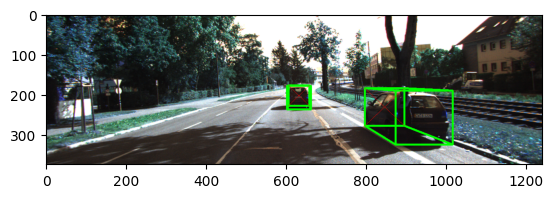

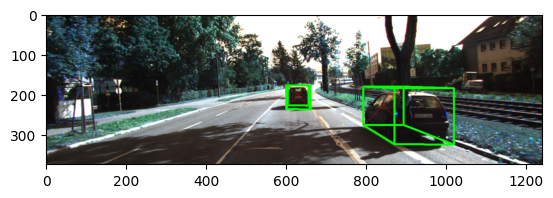

GT [ 2.15        0.91499996 14.83      ] CALC [ 2.13  0.91 14.81]
GT [-5.87       1.1800001 17.52     ] CALC [-5.67  1.08 16.91]
GT [ 1.08        0.79499996 21.88      ] CALC [ 1.07  0.76 21.95]
GT [-1.31   1.125 33.9  ] CALC [-1.35  1.11 34.41]
GT [-3.48   1.165 43.72 ] CALC [-3.51  1.13 43.98]


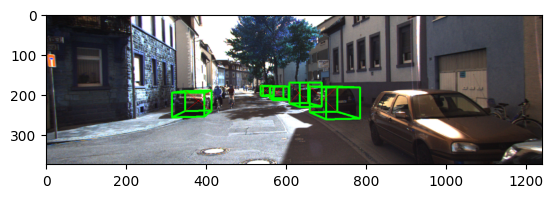

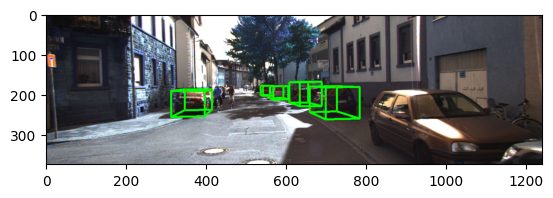

GT [-3.68  1.22 45.59] CALC [-3.66  1.14 44.97]


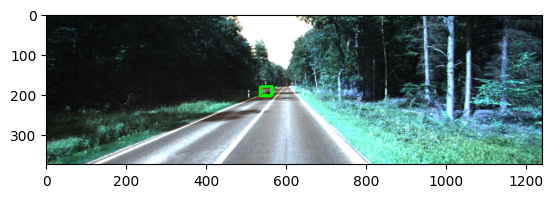

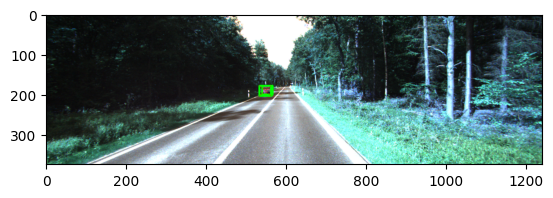

GT [-16.83    2.405  53.36 ] CALC [-16.84   2.34  53.25]


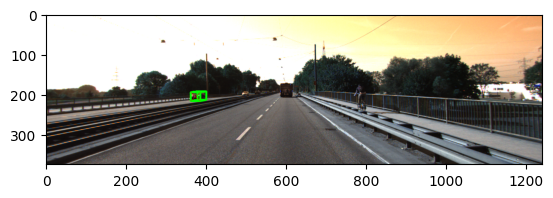

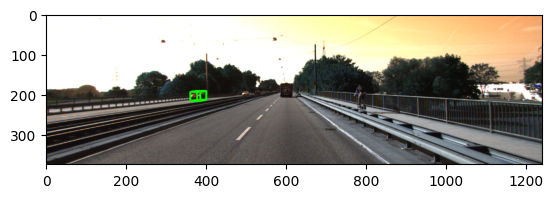

GT [ 0.2        1.1700001 45.16     ] CALC [ 0.15  1.13 45.16]
GT [-12.69        1.4300001  25.       ] CALC [-12.65   1.41  24.87]


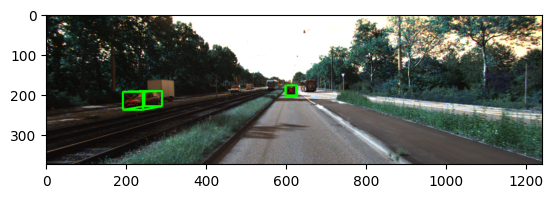

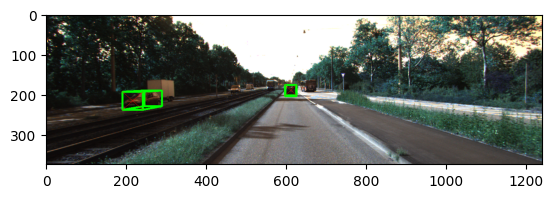

In [ ]:
from torch_lib.KITTI_Dataset import Object3d, FrameCalibrationData
from library.ron_utils import *
import glob, os, re
import cv2
import matplotlib.pyplot as plt
# weights/0830_Adam/Elan_BL_B4_N1_50.pkl
# IVA_scenario_data_NCTU/day-rain
#rons_folder = '0830_Adam/Elan_3d_box/BL_B4_N1'
'''
ELAN_cam_to_img = np.array([
            [1.418667e+03, 0.000e+00, 6.4e+02, 0],
            [0.000e+00, 1.418867e+03, 3.6e+02, 0],
            [0.000e+00, 000e+00, 1.0e+00, 0] ])
'''


cls_list = ['car']
diff_list = [1, 2]
#images = sorted(glob.glob('Elan_3d_box/image_2/*.png'))
#labels = sorted(glob.glob('Elan_3d_box/renew_label/*.txt'))
images = sorted(glob.glob('Kitti/training/image_2/*.png'))
labels = sorted(glob.glob('Kitti/training/label_2/*.txt'))
calibs = sorted(glob.glob('Kitti/training/calib/00????.txt'))

reg_labels = sorted(glob.glob('0922_ln_iou_1/KITTI_BL_B4_aug_vgg/*.txt'))

for i in range(200,205):#len(zzys_labels)):
    objects = [Object3d(line) for line in open(labels[i]).readlines()]
    img = cv2.imread(images[i])
    calc_img = np.copy(img)
    cam_to_img = FrameCalibrationData(calibs[i]).p2
    for obj in objects:
        #class_ = obj.cls_type
        if obj.cls_type in cls_list and obj.level in diff_list:
            #truncation = obj.truncation
            #occlusion = obj.occlusion
            alpha = obj.alpha
            ry = obj.ry
            gt_box2d = obj.box2d
            dim = obj.dim
            loc = obj.pos
            loc[1] -= dim[0]/2
            theta_ray = calc_theta_ray(img.shape[1], gt_box2d, cam_to_img)
            #cv2.rectangle(img, (obj.box2d[0], obj.box2d[1]), (obj.box2d[2], obj.box2d[3]), (255,0,0), 2)
            gt_prj_box = loc3d_2_box2d(ry, loc, dim, cam_to_img)
            gt_prj_box[0] += 27
            gt_prj_box[2] += 27 #elan data right shift 27
            calc_loc, _ = calc_location(dim, cam_to_img, gt_box2d, alpha, theta_ray)
            calc_loc = np.round(calc_loc, 2)
            calc_prj_box = loc3d_2_box2d(ry, calc_loc, dim, cam_to_img)
            #calc_prj_box[0] += 27
            #calc_prj_box[2] += 27 #elan data right shift 27
            #print('GT', loc, 'CALC', calc_loc)

            #cv2.rectangle(img, (obj.box2d[0], obj.box2d[1]), (obj.box2d[2], obj.box2d[3]), (255,0,0), 2)
            #cv2.rectangle(img, (gt_prj_box[0], gt_prj_box[1]), (gt_prj_box[2], gt_prj_box[3]), (0,0,255), 2)
            #cv2.rectangle(img, (calc_prj_box[0], calc_prj_box[1]), (calc_prj_box[2], calc_prj_box[3]), (0,255,0), 2)
            #print(calc_IoU_2d(gt_prj_box, calc_prj_box))
            #elan_plot_3d_box(img, cam_to_img, ry, dim, calc_loc)
            plot_3d_box(img, cam_to_img, ry, dim, loc)
            plot_3d_box(calc_img, cam_to_img, ry, dim, calc_loc)

    plt.imshow(img)
    plt.show()
    plt.imshow(calc_img)
    plt.show()


## FIND BUG of IOU loss not updating

In [ ]:
import torch
class LeastSquares:
    def __init__(self, device):
        self.device = device
    
    def lstq(self, A, Y, lamb=0.0):
        """
        Differentiable least square
        :param A: m x n
        :param Y: n x 1
        """
        A = A.to(self.device)
        Y = Y.to(self.device)
        # Assuming A to be full column rank
        cols = A.shape[1]
        #print (torch.linalg.matrix_rank(A))
        if cols == torch.linalg.matrix_rank(A):
            q, r = torch.linalg.qr(A, 'reduced')
            q = q.to(self.device)
            r = r.to(self.device)
            #print(type(r), type(q), type(Y))
            #print(r.device, q.device, Y.device)
            x = torch.inverse(r) @ q.T @ Y
        else:
            A_dash = A.permute(1, 0) @ A + lamb * torch.eye(cols, dtype=torch.float, device=self.device)
            #print(A.shape, A_dash.shape)
            Y_dash = A.permute(1, 0) @ Y
            x = self.lstq(A_dash, Y_dash)
        return x

In [3]:
from torch_lib.KITTI_Dataset import *
from torch_lib.Model_heading_bin import *
from library.ron_utils import *
import torch
import torch.nn.functional as F
from torchvision.models import vgg
from torch.utils import data
from torchvision import transforms
import time

cfg = {'path':'Kitti/training',
            'class_list':['car'], 'diff_list': [1, 2], #0:DontCare, 1:Easy, 2:Moderate, 3:Hard, 4:Unknown
            'bins': 4, 'cond':False, 'group':False, 'network':0}
keep_same_seeds(2023)
device = torch.device(f'cuda:0') # 選gpu的index
batch_size = 16 #64 worse than 8
W_dim = 1 #0.1~0.14
W_theta = 1 #0.03~1
W_group = 0.6 # 0.02
W_consist = 1 #數值小0.02~0.04  TODO W_consist要調高(0818) tried bad:3,5
W_angle = 0.1 #數值大0.05~0.2
W_iou = 1 # 數值大0.3~0.5 0919:0.2
W_depth = 0.05 # 2
# make weights folder
bin_num = cfg['bins']
# model
print("Loading all detected objects in dataset...")
print('Kitti dataset')
process = transforms.Compose([transforms.ToTensor(), 
                            transforms.Resize([224,224], transforms.InterpolationMode.BICUBIC), 
                            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset_train = KITTI_Dataset(cfg, process, split='train')
dataset_valid = KITTI_Dataset(cfg, process, split='val')
params = {'batch_size': batch_size,
            'shuffle': False,
            'num_workers': 6}

train_loader = data.DataLoader(dataset_train, **params)
valid_loader = data.DataLoader(dataset_valid, **params)
angle_per_class=2*np.pi/float(bin_num)

Loading all detected objects in dataset...
Kitti dataset


In [9]:
from torch.autograd import Variable
from library.ron_utils import calc_depth_with_alpha_theta_tensor
from library.Math_tensor import *
import time
keep_same_seeds(2023)
epochs = 1
my_vgg = vgg.vgg19_bn(weights='DEFAULT') #512x7x7
model = vgg_Model(features=my_vgg.features, bins=bin_num).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)
total_batches = len(train_loader)
start = time.time()
print('total_batches', total_batches)

new_weights = [Variable(torch.FloatTensor([val]), requires_grad=True) for val in (1,1,0.5, 1)]
#new_weights = new_weights.to(device)
W_dim, W_theta, W_iou, W_depth = new_weights
W_dim = W_dim.to(device)
W_theta = W_theta.to(device)
W_iou = W_iou.to(device)
W_depth = W_depth.to(device)


is_iou =  1

for epoch in range(1, epochs+1):
    avg_bin_loss, avg_residual_loss, avg_theta_loss = 0, 0, 0
    avg_dim_loss, avg_consist_loss, avg_angle_loss, avg_depth_loss = 0,0,0,0
    avg_total_loss, avg_iou_loss = 0, 0
    model.train()
    for batch_L, labels_L, batch_R, labels_R in train_loader:
        optimizer.zero_grad()

        gt_residual = labels_L['Heading_res'].float().to(device)
        gt_bin = labels_L['Heading_bin'].long().to(device)#這個角度在哪個class上
        gt_dim = labels_L['Dim_delta'].float().to(device)
        gt_theta_ray_L = labels_L['Theta_ray'].to(device)
        gt_theta_ray_R = labels_R['Theta_ray']
        gt_depth = labels_L['Depth'].float().to(device)
        gt_img_W = labels_L['img_W']
        gt_box2d = labels_L['Box2d'].numpy()
        gt_calib = labels_L['Calib'].numpy()
        gt_class = labels_L['Class']
        gt_locs = labels_L['Location'].float().to(device)
        gt_rys = labels_L['Ry'].numpy()
        gt_alphas = labels_L['Alpha'].to(device)

        batch_L=batch_L.float().to(device)
        batch_R=batch_R.float().to(device)
        [residual_L, bin_L, dim_L] = model(batch_L)

        bin_loss = W_theta * F.cross_entropy(bin_L, gt_bin, reduction='mean').to(device)
        residual_loss = W_theta * compute_residual_loss(residual_L, gt_bin, gt_residual, device)
        theta_loss = bin_loss + residual_loss
        
        #dim_loss = F.mse_loss(dim, gt_dim, reduction='mean')  # org use mse_loss
        dim_loss = W_dim * F.l1_loss(dim_L, gt_dim, reduction='mean')  # 0613 added (monodle, monogup used) (compare L1 vs mse loss)
        #dim_loss = W_dim * L1_loss_alpha(dim_L, gt_dim, GT_alphas, device) # 0613 try elevate dim performance       
        #dim_loss = W_dim * F.mse_loss(dim_L, gt_dim, reduction='mean').to(device) # 0613 try elevate dim performance
        loss = dim_loss + theta_loss

        reg_alphas = compute_alpha(bin_L, residual_L, angle_per_class)
        iou_loss = torch.tensor(0.0).to(device)
        if is_iou > 0:
            reg_dims = torch.tensor(dataset_train.get_cls_dim_avg('car')) + dim_L.cpu().clone()
            if is_iou == 1:
                iou_loss = W_iou * calc_IoU_loss_tensor(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib, device) #iou
            elif is_iou == 2:
                iou_loss = W_iou * calc_IoU_loss_tensor(gt_box2d, gt_theta_ray_L, reg_dims, torch.tensor(gt_alphas), gt_calib, device) #iouA
        
        print('TRAIN iou loss', iou_loss)
        
        loss += iou_loss
        loss.backward()
        a = list(model.parameters())[-1].clone()
        optimizer.step()
        b = list(model.parameters())[-1].clone()
        #print('IS EQUAL?', torch.equal(a.data, b.data))
        #print('model grad:', list(model.parameters())[-1].grad)
        

        with torch.no_grad():
            iou_loss = torch.tensor(0.0).to(device)
            if is_iou > 0:
                reg_dims = torch.tensor(dataset_train.get_cls_dim_avg('car')) + dim_L.cpu().clone()
                # one take 1.38s (iou_loss = W_iou * calc_IoU_loss_tensor(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib, device)
                # faster computation ? Yes, 0.05s
                gt_theta_ray = gt_theta_ray_L.cpu().detach().numpy()
                reg_dim = reg_dims.cpu().detach().numpy()
                reg_alpha = reg_alphas.cpu().detach().numpy()
                if is_iou == 1:
                    iou_loss = W_iou * calc_IoU_loss(gt_box2d, gt_theta_ray, reg_dim, reg_alpha, gt_calib).to(device)
                elif is_iou == 2:
                    iou_loss = W_iou * calc_IoU_loss(gt_box2d, gt_theta_ray_L.detach().cpu().numpy(), reg_dims.detach().numpy(), gt_alphas, gt_calib).to(device)
            print('EVAL iou loss', iou_loss)
        
        avg_bin_loss += bin_loss.item()*len(batch_L)
        avg_residual_loss += residual_loss.item()*len(batch_L)
        avg_theta_loss += theta_loss.item()*len(batch_L)
        avg_dim_loss += dim_loss.item()*len(batch_L)
        avg_total_loss += loss.item()*len(batch_L)
        avg_iou_loss += iou_loss.item()*len(batch_L)
    break

#model grad: tensor([-1.2500e-01,  2.0833e-01, -3.7253e-09], device='cuda:0'), dep:17.6384, loss:19.5395


total_batches 510
TRAIN iou loss tensor([0.1942], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1943], device='cuda:0')
TRAIN iou loss tensor([0.1591], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1603], device='cuda:0')
TRAIN iou loss tensor([0.1774], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1781], device='cuda:0')
TRAIN iou loss tensor([0.1589], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1586], device='cuda:0')
TRAIN iou loss tensor([0.1718], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1732], device='cuda:0')
TRAIN iou loss tensor([0.1801], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1814], device='cuda:0')
TRAIN iou loss tensor([0.1800], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1788], device='cuda:0')
TRAIN iou loss tensor([0.1732], device='cuda:0', grad_fn=<MulBackward0>)
EVAL iou loss tensor([0.1743], device='cuda:0')
TRAIN iou loss

KeyboardInterrupt: 

In [5]:
_alphas

tensor([-0.1373,  0.0793,  1.6369,  1.7386, -0.0624, -3.1078, -0.0127, -0.0064,
         1.5183, -3.0111,  0.0132, -0.0927,  0.0810, -0.0485, -0.0448,  0.0195],
       grad_fn=<CopySlices>)

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from library.ron_utils import loc3d_2_box2d, calc_IoU_2d
def calc_IoU_loss(gt_box2d, gt_theta_ray, reg_dims, reg_alphas, calib):
    #iou_loss = torch.tensor(0.0)
    iou_loss_list = list()
    reg_ry = reg_alphas + gt_theta_ray
    for i in range(len(reg_dims)):
        reg_loc, _ = calc_location(reg_dims[i], calib[i], gt_box2d[i], reg_ry[i], gt_theta_ray[i])
        prj_box2d = loc3d_2_box2d(reg_ry[i], reg_loc, reg_dims[i], calib[i])
        iou_value = calc_IoU_2d(gt_box2d[i], prj_box2d)
        #iou_loss += torch.tensor(1 - iou_value) #0919ver. 會和giou_loss大小相同
        #iou_loss += -1 * torch.log(torch.tensor(iou_value)) #https://zhuanlan.zhihu.com/p/359982543
        iou_loss_list.append(F.l1_loss(torch.tensor(1.0), torch.tensor(iou_value))) #0926ver. cause somewhere wrong above (not converge)
    iou_loss_list = torch.tensor(iou_loss_list)
    iou_loss = iou_loss_list.sum() / len(iou_loss_list)
    return iou_loss.requires_grad_(True)

In [98]:
gt_box2d = [[614, 181, 727, 284],[564, 174, 616, 224],[601, 177, 659, 229]]
gt_theta_ray_L = np.array([ 0.0678, -0.0429,  0.0125])
reg_dims_list = [[1.4961628, 1.7776344, 3.9169898],
            [1.5289202, 1.7368153, 3.9200547],
            [1.373579,  1.8774742, 4.0043626]]
reg_alphas = [-0.13729566,  0.07932745,  1.6369451 ]
gt_calib = [
    [[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
    [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
    [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]],
    [[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
    [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
    [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]],
    [[7.215377e+02, 0.000000e+00, 6.095593e+02, 4.485728e+01],
    [0.000000e+00, 7.215377e+02, 1.728540e+02, 2.163791e-01],
    [0.000000e+00, 0.000000e+00, 1.000000e+00, 2.745884e-03]],
  ]
#print(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib)
iou_loss = 1 * calc_IoU_loss(gt_box2d, gt_theta_ray_L, reg_dims_list, reg_alphas, gt_calib)
print(iou_loss)

tensor(0.4015, dtype=torch.float64, grad_fn=<MulBackward0>)


In [1]:
def calc_IoU_loss_tensor(gt_box2d, gt_theta_ray, reg_dims, reg_alphas, calib, device):
    iou_loss = torch.tensor(0.0).to(device)
    #iou_loss_list = list()
    reg_ry = reg_alphas + gt_theta_ray
    for i in range(len(reg_dims)):
        #print(type(reg_dims[i]), type(calib[i]), type(gt_box2d[i]), type(reg_ry[i]), type(gt_theta_ray[i]))
        #A1, b1 = calc_location_tensor(reg_dims[i], calib[i], gt_box2d[i], reg_ry[i], gt_theta_ray[i], device)
        #print(A1, b1)
        reg_loc, _ = calc_location_tensor(reg_dims[i], calib[i], gt_box2d[i], reg_ry[i], gt_theta_ray[i], device)
        #print('reg_loc', reg_loc.requires_grad)
        calib_tensor = torch.tensor(calib[i], dtype=torch.float)
        prj_box2d = loc3d_2_box2d_tensor(reg_ry[i], reg_loc, reg_dims[i], calib_tensor, device)
        #print('prj_box2d', prj_box2d.requires_grad)
        gt_box2d_tensor = torch.tensor(gt_box2d[i], dtype=torch.float).to(device)
        iou_value = calc_IoU_2d_tensor(gt_box2d_tensor, prj_box2d)
        #print('iou_value', iou_value.requires_grad)
        #iou_loss += torch.tensor(1 - iou_value) #0919ver. 會和giou_loss大小相同
        #iou_loss += -1 * torch.log(torch.tensor(iou_value)) #https://zhuanlan.zhihu.com/p/359982543
        iou_loss += F.l1_loss(torch.tensor(1.0).to(device), iou_value) #0926ver. cause somewhere wrong above (not converge)
    iou_loss = iou_loss / len(reg_dims)
    return iou_loss

gt_theta_ray_L = labels_L['Theta_ray']
#gt_box2d_one, prj_box2d = calc_IoU_loss_tensor(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib)
#print(reg_alphas, reg_alphas.requires_grad)
iou_loss = 1 * calc_IoU_loss_tensor(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib, device)
# faster computation ?
iou_loss_old = 1 * calc_IoU_loss(gt_box2d, gt_theta_ray_L, reg_dims, reg_alphas, gt_calib).to(device)
print(round(iou_loss.item(), 4), round(iou_loss_old.item(), 4))

NameError: name 'labels_L' is not defined

In [203]:
def calc_IoU_2d_tensor(box1, box2):
    area1 = (box1[2]-box1[0])*(box1[3]-box1[1])
    area2 = (box2[2]-box2[0])*(box2[3]-box2[1])
    area_sum = abs(area1) + abs(area2)
    
    #計算重疊方形座標
    x1 = max(box1[0], box2[0]) # left
    y1 = max(box1[1], box2[1]) # top
    x2 = min(box1[2], box2[2]) # right
    y2 = min(box1[3], box2[3]) # btm

    if x1 >= x2 or y1 >= y2:
        return 0
    else:
        area_overlap = abs((x2-x1)*(y2-y1))

    area_union = area_sum-area_overlap
    return area_overlap/area_union

gt_box2d_tensor = torch.tensor(gt_box2d_one, dtype=torch.float).to(device)
#print(gt_box2d_tensor, prj_box2d)
#print(prj_box2d.requires_grad)
calc_IoU_2d_tensor(gt_box2d_tensor, prj_box2d)

tensor(0.4916, device='cuda:0', grad_fn=<DivBackward0>)

In [184]:
point = torch.tensor([4., 2., 2.], requires_grad=True)
point = point[:2]/point[2]
print(point.requires_grad) #True
point = point.type(torch.int)
print(point.requires_grad)

True
False


In [196]:
def project_3d_pt_tensor(pt, cam_to_img, device):
    one = torch.tensor([1]).to(device)
    point = torch.cat((pt, one))
    point = torch.matmul(cam_to_img.to(device), point)
    point = point[:2]/point[2]
    return point

def loc3d_2_box2d_tensor(orient, location, dimension, cam_to_img, device):
    prj_points = []
    ty = orient
    R = torch.FloatTensor([[torch.cos(ty), 0, torch.sin(ty)], [0, 1, 0], [-torch.sin(ty), 0, torch.cos(ty)]]) 
    corners = create_corners_tensor(dimension, location, R, device)
    for corner in corners:
        point = project_3d_pt_tensor(corner, cam_to_img, device)
        prj_points.append(point)

    prj_points = torch.stack(prj_points)
    prj_points_X = prj_points[:,0]
    prj_points_Y = prj_points[:,1]
    prj_box = torch.stack([min(prj_points_X), min(prj_points_Y), max(prj_points_X), max(prj_points_Y)])
    return prj_box

def create_corners_tensor(dimension, location, R, device):
    dx = dimension[2] / 2
    dy = dimension[0] / 2
    dz = dimension[1] / 2

    x_corners = []
    y_corners = []
    z_corners = []

    for i in [1, -1]:
        for j in [1,-1]:
            for k in [1,-1]:
                x_corners.append(dx*i)
                y_corners.append(dy*j)
                z_corners.append(dz*k)

    corners = torch.FloatTensor([x_corners, y_corners, z_corners]).to(device)
    R = torch.FloatTensor(R).to(device)

    # rotate with R 
    corners = torch.matmul(R, corners)
    # shift with location 
    for i, loc in enumerate(location):
        corners[i,:] = corners[i,:] + loc

    final_corners = []
    for i in range(8):
        final_corners.append(torch.stack([corners[0][i], corners[1][i], corners[2][i]]))
    return torch.stack(final_corners)

def calc_location_tensor(dimension, proj_matrix, box2d, alpha, theta_ray, device):
    #global orientation
    #orient = alpha + theta_ray
    #R = rotation_matrix(orient)
    # no grad here (TODO)
    ls = LeastSquares(device)
    ty = alpha + theta_ray
    R = torch.FloatTensor([[torch.cos(ty), 0, torch.sin(ty)], [0, 1, 0], [-torch.sin(ty), 0, torch.cos(ty)]]) 
    proj_matrix = torch.FloatTensor(proj_matrix)
    if len(box2d) == 2: # [ [left, top], [btm, right] ]
        # format 2d corners
        xmin = box2d[0][0]
        ymin = box2d[0][1]
        xmax = box2d[1][0]
        ymax = box2d[1][1]
    elif len(box2d) == 4: # [ left, top, btm, right ]
        xmin = box2d[0]
        ymin = box2d[1]
        xmax = box2d[2]
        ymax = box2d[3]

    # left top right bottom
    box_corners = [xmin, ymin, xmax, ymax]

    # get the point constraints
    constraints = []

    left_constraints = []
    right_constraints = []
    top_constraints = []
    bottom_constraints = []

    # using a different coord system
    dx = dimension[2] / 2
    dy = dimension[0] / 2
    dz = dimension[1] / 2

    # below is very much based on trial and error

    # based on the relative angle, a different configuration occurs
    # negative is back of car, positive is front
    left_mult = 1
    right_mult = -1

    # about straight on but opposite way
    if alpha < torch.deg2rad(torch.tensor(92.)) and alpha > torch.deg2rad(torch.tensor(88.)):
        left_mult = 1
        right_mult = 1
    # about straight on and same way
    elif alpha < torch.deg2rad(torch.tensor(-88.)) and alpha > torch.deg2rad(torch.tensor(-92.)):
        left_mult = -1
        right_mult = -1
    # this works but doesnt make much sense
    elif alpha < torch.deg2rad(torch.tensor(90.)) and alpha > -torch.deg2rad(torch.tensor(90.)):
        left_mult = -1
        right_mult = 1

    # if the car is facing the oppositeway, switch left and right
    switch_mult = -1
    if alpha > 0:
        switch_mult = 1

    # left and right could either be the front of the car ot the back of the car
    # careful to use left and right based on image, no of actual car's left and right
    for i in (-1,1):
        left_constraints.append([left_mult * dx, i*dy, -switch_mult * dz])
    for i in (-1,1):
        right_constraints.append([right_mult * dx, i*dy, switch_mult * dz])

    # top and bottom are easy, just the top and bottom of car
    for i in (-1,1):
        for j in (-1,1):
            top_constraints.append([i*dx, -dy, j*dz])
    for i in (-1,1):
        for j in (-1,1):
            bottom_constraints.append([i*dx, dy, j*dz])

    # now, 64 combinations
    for left in left_constraints:
        for top in top_constraints:
            for right in right_constraints:
                for bottom in bottom_constraints:
                    constraints.append([left, top, right, bottom])

    # filter out the ones with repeats
    constraints = filter(lambda x: len(x) == len(set(tuple(i) for i in x)), constraints)
    

    # create pre M (the term with I and the R*X)
    pre_M = torch.eye(4)
    # 1's down diagonal
    #pre_M = torch.zeros([4,4])
    #for i in range(0,4):
    #    pre_M[i][i] = 1

    best_loc = None
    best_error = None
    best_X = None

    # loop through each possible constraint, hold on to the best guess
    # constraint will be 64 sets of 4 corners
    count = 0
    for constraint in constraints:
    
        # each corner
        Xa = torch.stack(constraint[0], axis=0).view(-1,1)
        Xb = torch.stack(constraint[1], axis=0).view(-1,1)
        Xc = torch.stack(constraint[2], axis=0).view(-1,1)
        Xd = torch.stack(constraint[3], axis=0).view(-1,1)

        X_array = [Xa, Xb, Xc, Xd]

        # M: all 1's down diagonal, and upper 3x1 is Rotation_matrix * [x, y, z]
        Ma = torch.clone(pre_M)
        Mb = torch.clone(pre_M)
        Mc = torch.clone(pre_M)
        Md = torch.clone(pre_M)

        M_array = [Ma, Mb, Mc, Md]

        # create A, b
        A = torch.zeros([4,3], dtype=torch.float32)
        b = torch.zeros([4,1])

        indicies = [0,1,0,1]
        for row, index in enumerate(indicies):
            X = X_array[row]
            M = M_array[row]

            # create M for corner Xx
            #RX = np.dot(R, X)
            RX = torch.matmul(R, X)
            #tensordot(a, b, dims=([1, 0], [0, 1]
            M[:3,3] = RX.reshape(3)

            M = torch.matmul(proj_matrix, M)

            A[row, :] = M[index,:3] - box_corners[row] * M[2,:3]
            b[row] = box_corners[row] * M[2,3] - M[index,3]

        # solve here with least squares, since over fit will get some error
        #loc, _, rank, s = torch.linalg.lstsq(A, b, rcond=None) # error is empty
        loc = ls.lstq(A, b, 0.0010)
        _, error, _, _ = np.linalg.lstsq(A.detach().numpy(), b.detach().numpy(), rcond=None)

        # found a better estimation
        if best_error is None :
            count += 1 # for debugging
            best_loc = loc
            best_error = error
            best_X = X_array
            
        elif error < best_error:
            count += 1 # for debugging
            best_loc = loc
            best_error = error
            best_X = X_array

    # return best_loc, [left_constraints, right_constraints] # for debugging
    #print(best_loc, 'req_grad', best_loc.requires_grad)
    best_loc = torch.stack([best_loc[0][0], best_loc[1][0], best_loc[2][0]])
    return best_loc, best_X

In [75]:
tt = [torch.tensor(-1.9585, requires_grad=True), torch.tensor(-0.7481, requires_grad=True), torch.tensor(0.8888, requires_grad=True)]
tt = torch.stack(tt, axis=0)
print(tt, tt.requires_grad)

tensor([-1.9585, -0.7481,  0.8888], grad_fn=<StackBackward0>) True


In [ ]:
    avg_bin_loss/=len(dataset_train)
    avg_residual_loss/=len(dataset_train)
    avg_theta_loss/=len(dataset_train)
    avg_dim_loss/=len(dataset_train)
    avg_depth_loss/=len(dataset_train)
    avg_total_loss/=len(dataset_train)
    avg_iou_loss/=len(dataset_train)

    #print(f'Epoch:{epoch} lr = {scheduler.get_last_lr()[0]}')
    print("--- epoch %s Train--- [loss:%.3f],[theta_loss:%.3f],[dim_loss:%.3f],[iou_loss:%.3f],[depth_loss:%.3f]" \
        %(epoch, avg_total_loss, avg_theta_loss, avg_dim_loss, avg_iou_loss, avg_depth_loss))
    # save after every 10 epochs
    # scheduler.step()
    
    model.eval()
    with torch.no_grad():
        eval_bin_loss, eval_residual_loss, eval_theta_loss = 0,0,0
        eval_dim_loss, eval_consist_loss, eval_angle_loss, eval_depth_loss = 0,0,0,0
        eval_total_loss, eval_iou_loss = 0, 0
        GT_alpha_list = list()
        REG_alpha_list = list()
        GT_dim_list = list()
        REG_dim_list = list()
        for batch_L, labels_L, batch_R, labels_R in valid_loader:
            gt_residual = labels_L['Heading_res'].float().to(device)
            gt_bin = labels_L['Heading_bin'].long().to(device)#這個角度在哪個class上
            gt_dim = labels_L['Dim_delta'].float().to(device)
            gt_theta_ray_L = labels_L['Theta_ray'].numpy()
            gt_theta_ray_R = labels_R['Theta_ray'].numpy()
            gt_depth = labels_L['Depth'].float().to(device)
            gt_img_W = labels_L['img_W']
            gt_box2d = labels_L['Box2d'].numpy()
            gt_calib = labels_L['Calib'].numpy()
            gt_class = labels_L['Class']

            batch_L=batch_L.float().to(device)
            [residual_L, bin_L, dim_L] = model(batch_L)

            bin_loss = W_theta * F.cross_entropy(bin_L, gt_bin, reduction='mean').to(device)
            residual_loss = W_theta * compute_residual_loss(residual_L, gt_bin, gt_residual, device)
            theta_loss = bin_loss + residual_loss
            
            GT_alphas = labels_L['Alpha'].to(device)
            dim_loss = W_dim * F.l1_loss(dim_L, gt_dim, reduction='mean') 
            val_alphas = compute_alpha(bin_L, residual_L, angle_per_class)
            val_dims = dataset_train.get_cls_dim_avg('car') + dim_L.cpu().detach().numpy()
            iou_loss = W_iou * calc_IoU_loss(gt_box2d, gt_theta_ray_L, val_dims, val_alphas, gt_calib).to(device)
            loss = dim_loss + theta_loss #+ iou_loss
            #loss = iou_loss

            # reg part
            GT_alphas = angle_per_class*gt_bin + gt_residual
            REG_alpha_list += val_alphas.tolist()
            GT_alpha_list += GT_alphas.cpu().tolist()
            REG_dim_list += dim_L.cpu().tolist()
            GT_dim_list += gt_dim.cpu().tolist()
            # sum loss
            eval_bin_loss += bin_loss.item()*len(batch_L)
            eval_residual_loss += residual_loss.item()*len(batch_L)
            eval_theta_loss += theta_loss.item()*len(batch_L)
            eval_dim_loss += dim_loss.item()*len(batch_L)
            eval_total_loss += loss.item()*len(batch_L)
            eval_iou_loss += iou_loss.item()*len(batch_L)
        
        eval_bin_loss/=len(dataset_valid)
        eval_residual_loss/=len(dataset_valid)
        eval_theta_loss/=len(dataset_valid)
        eval_dim_loss/=len(dataset_valid)
        eval_total_loss/=len(dataset_valid)
        eval_iou_loss/=len(dataset_valid)

        print("--- epoch %s EVAL --- [loss:%.3f],[theta_loss:%.3f],[dim_loss:%.3f],[iou_loss:%.3f],[depth_loss:%.3f]" \
        %(epoch, eval_total_loss, eval_theta_loss, eval_dim_loss, eval_iou_loss, eval_depth_loss))

        alpha_performance = angle_criterion(REG_alpha_list, GT_alpha_list)
        GT_dim_list = np.array(GT_dim_list)
        REG_dim_list = np.array(REG_dim_list)
        dim_performance =  np.mean(abs(GT_dim_list-REG_dim_list), axis=0)
        print(f'[Alpha diff]: {alpha_performance:.4f}') #close to 0 is better
        print(f'[DIM diff] H:{dim_performance[0]:.4f}, W:{dim_performance[1]:.4f}, L:{dim_performance[2]:.4f}')

## Visualize IoU loss 3d box

In [23]:
# call it when using Object3D.generate_corners3d()
def my_plot_3d_box(corners_3d, cam_to_img, img, index, color=(0,255,0)):
    pt_3d = list()
    for corner in corners_3d:
        point = project_3d_pt(corner, cam_to_img)
        #cv2.circle(img, point, (i+1)*2, (255,0,0), -1)
        pt_3d.append(point)
    #btm
    for i in range(0,4): 
        #btm
        cv2.line(img, pt_3d[i], pt_3d[(i+1)%4], color, 2)
        #top
        cv2.line(img, pt_3d[4+i], pt_3d[4+(i+1)%4], color, 2)
        #vertical
        cv2.line(img, pt_3d[i], pt_3d[i+4], color, 2)
    #front
    cv2.line(img, pt_3d[0], pt_3d[5], (255,0,0), 2)
    cv2.line(img, pt_3d[1], pt_3d[4], (255,0,0), 2)

[Depth] GT:7.860000133514404, BL:7.409999847412109, IOU:7.46999979019165
[Alpha] GT:2.04, BL:1.96, IOU:1.97
[H] GT:1.57, BL:1.58, IOU:1.6
[W] GT:1.5, BL:1.53, IOU:1.6
[L] GT:3.68, BL:3.93, IOU:3.86


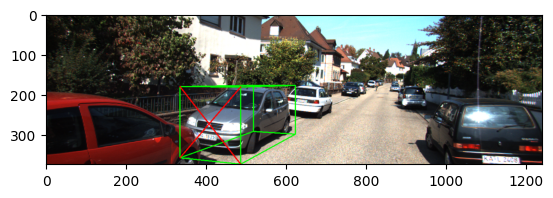

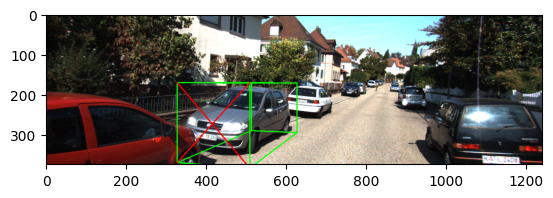

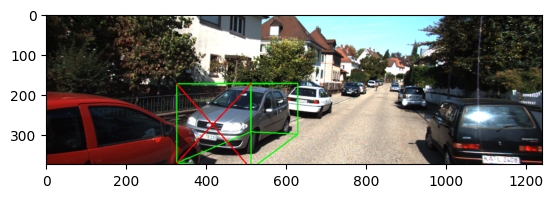

[Depth] GT:14.4399995803833, BL:11.0600004196167, IOU:11.319999694824219
[Alpha] GT:-1.33, BL:-1.54, IOU:-1.6
[H] GT:1.47, BL:1.6, IOU:1.62
[W] GT:1.6, BL:1.47, IOU:1.53
[L] GT:3.66, BL:3.7, IOU:3.85


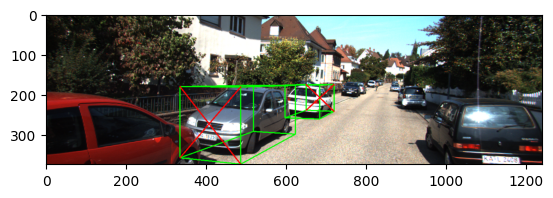

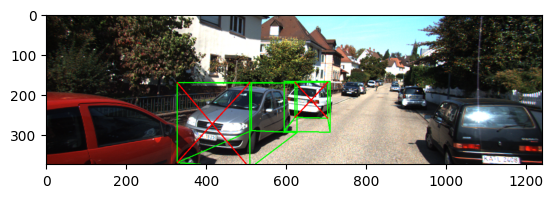

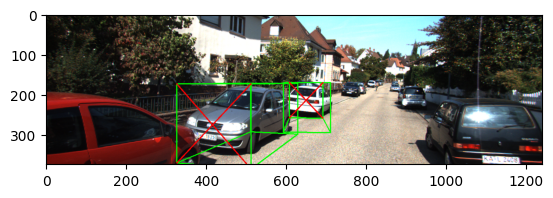

[Depth] GT:33.20000076293945, BL:30.719999313354492, IOU:32.22999954223633
[Alpha] GT:1.74, BL:1.71, IOU:1.77
[H] GT:1.7, BL:1.64, IOU:1.66
[W] GT:1.63, BL:1.57, IOU:1.53
[L] GT:4.08, BL:4.04, IOU:3.91


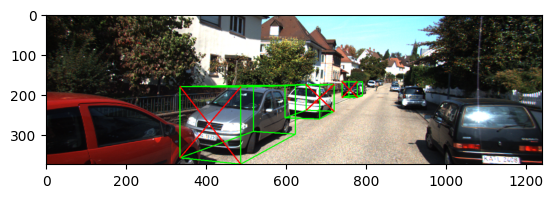

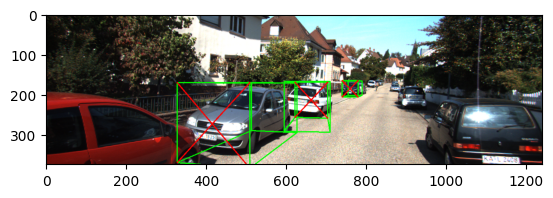

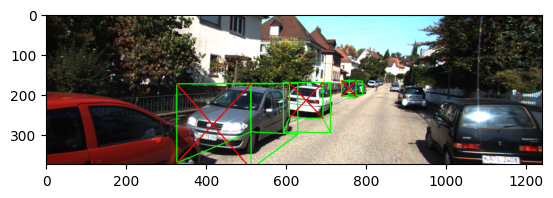

[Depth] GT:19.959999084472656, BL:19.709999084472656, IOU:19.579999923706055
[Alpha] GT:-1.65, BL:-1.58, IOU:-1.6
[H] GT:1.59, BL:1.64, IOU:1.63
[W] GT:1.59, BL:1.59, IOU:1.51
[L] GT:2.47, BL:3.67, IOU:3.85


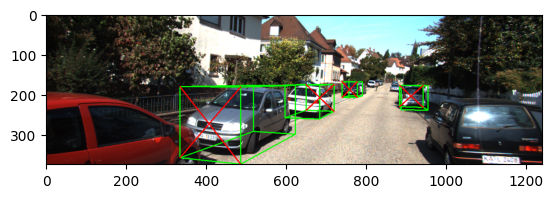

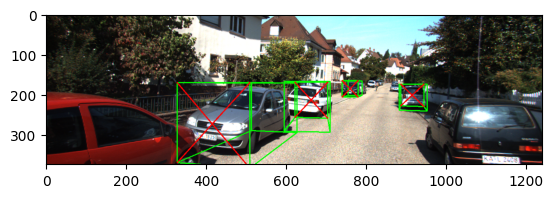

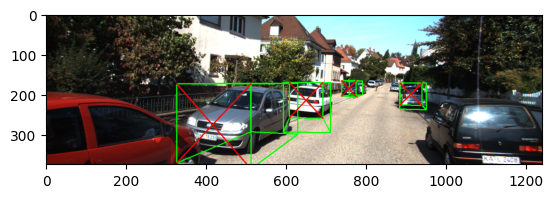

'\nIOUs = list()\nGIOUs = list()\n\n            #cv2.rectangle(reg_img_3d, overlap[0], overlap[1], (0,255,0), -1)\n            IoU = calc_IoU_2d(box_2d, prj_box)\n            GIoU = calc_GIoU_2d(box_2d, prj_box)\n            \n            log_iou_loss = -1*np.log(IoU)\n            giou_loss = 1-GIoU #等於1-IoU\n            IOUs.append(log_iou_loss)\n'

In [35]:
import glob
import cv2
from library.Plotting import *
import matplotlib.pyplot as plt
import numpy as np
from torch_lib.KITTI_Dataset import Object3d, FrameCalibrationData

image_folder = 'Kitti/training/image_2'
gt_folder = 'Kitti/training/label_2'
bl_folder = '0928_BL/KITTI_BL_B4_vgg'
iou_folder = '1009_iou/KITTI_BL_B4_iou_vgg'
iouA_folder = '1009_iou/KITTI_BL_B4_iouA_vgg'
val_ids = [x.strip() for x in open('Kitti/ImageSets/val.txt').readlines()]

#'000008'
for id_ in ['000008']:
    cam_to_img= FrameCalibrationData(f'Kitti/training/calib/{id_}.txt').p2
    img = cv2.cvtColor(cv2.imread(f'{image_folder}/{id_}.png'), cv2.COLOR_BGR2RGB)
    gt_img = np.copy(img)
    bl_img = np.copy(img)
    iou_img = np.copy(img)

    gt_objects = [Object3d(line) for line in open(f'{gt_folder}/{id_}.txt').readlines()]
    bl_objects = [Object3d(line) for line in open(f'{bl_folder}/{id_}.txt').readlines()]
    iou_objects = [Object3d(line) for line in open(f'{iou_folder}/{id_}.txt').readlines()]
    index=0
    for i in range(len(gt_objects)):
        if gt_objects[i].level == 1 or gt_objects[i].level == 2:
            gt_o = gt_objects[i]
            bl_o = bl_objects[index]
            iou_o = iou_objects[index]
            gt_box2d = gt_o.box2d
            bl_box2d = bl_o.box2d
            iou_box2d = iou_o.box2d
            #cv2.rectangle(gt_img, (gt_box2d[0], gt_box2d[1]), (gt_box2d[2], gt_box2d[3]), (255,0,0), 2)
            #cv2.rectangle(bl_img, (bl_box2d[0], bl_box2d[1]), (bl_box2d[2], bl_box2d[3]), (0,255,0), 2)
            #cv2.rectangle(iou_img, (iou_box2d[0], iou_box2d[1]), (iou_box2d[2], iou_box2d[3]), (0,0,255), 2)

            gt_corners = gt_o.generate_corners3d()
            my_plot_3d_box(gt_corners, cam_to_img, gt_img)
            bl_corners = bl_o.generate_corners3d()
            my_plot_3d_box(bl_corners, cam_to_img, bl_img)
            iou_corners = iou_o.generate_corners3d()
            my_plot_3d_box(iou_corners, cam_to_img, iou_img)
            print(f'[Depth] GT:{round(gt_o.pos[2],2)}, BL:{round(bl_o.pos[2],2)}, IOU:{round(iou_o.pos[2],2)}')
            print(f'[Alpha] GT:{gt_o.alpha}, BL:{bl_o.alpha}, IOU:{iou_o.alpha}')
            print(f'[H] GT:{gt_o.h}, BL:{bl_o.h}, IOU:{iou_o.h}')
            print(f'[W] GT:{gt_o.w}, BL:{bl_o.w}, IOU:{iou_o.w}')
            print(f'[L] GT:{gt_o.l}, BL:{bl_o.l}, IOU:{iou_o.l}')
            
            index +=1

            plt.imshow(gt_img)
            plt.show()
            plt.imshow(bl_img)
            plt.show()
            plt.imshow(iou_img)
            plt.show()
'''
IOUs = list()
GIOUs = list()

            #cv2.rectangle(reg_img_3d, overlap[0], overlap[1], (0,255,0), -1)
            IoU = calc_IoU_2d(box_2d, prj_box)
            GIoU = calc_GIoU_2d(box_2d, prj_box)
            
            log_iou_loss = -1*np.log(IoU)
            giou_loss = 1-GIoU #等於1-IoU
            IOUs.append(log_iou_loss)
'''
